## Data Preprocessing -- Transform Audio to Image files

### Import all packages used

In [93]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from keras_tuner import GridSearch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data Preprocessing

In [ ]:
# Input and output directories
input_dir = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/fma_small/genres_original'
output_dir = '/projectnb/ds340/students/jmijares/audio_images'  # Save output in your personal directory

In [2]:
os.makedirs(output_dir, exist_ok=True)

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock', 'jazz']

for genre in genres:
    genre_input_path = os.path.join(input_dir, genre)
    genre_output_path = os.path.join(output_dir, genre)
    
    # Create the genre-specific folder in the output directory
    os.makedirs(genre_output_path, exist_ok=True)

    for file in os.listdir(genre_input_path):
        if file.endswith('.wav'):
            file_path = os.path.join(genre_input_path, file)
            output_file_path = os.path.join(genre_output_path, file.replace('.wav', '.png'))

            try:
                # Load audio file
                y, sr = librosa.load(file_path, sr=None)

                # Generate Mel spectrogram
                mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

                # Save the Mel spectrogram
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
                # Remove the colorbar, axis, and title
                plt.axis('off')
                plt.tight_layout()
                plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
                plt.close()

                print(f"Processed {file} -> {output_file_path}")

            except Exception as e:
                # Handle the exception and log the error
                print(f"Skipped {file} due to error: {e}")

Processed blues.00071.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00071.png
Processed blues.00058.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00058.png
Processed blues.00097.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00097.png
Processed blues.00067.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00067.png
Processed blues.00087.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00087.png
Processed blues.00081.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00081.png
Processed blues.00028.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00028.png
Processed blues.00065.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00065.png
Processed blues.00079.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00079.png
Processed blues.00018.wav -> /projectnb/ds340/students/jmijares/audio_images/blues/blues.00018.png
Processed 

/scratch/1385462.1.academic-gpu/ipykernel_779184/347294205.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipped jazz.00054.wav due to error: 
Processed jazz.00015.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00015.png
Processed jazz.00048.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00048.png
Processed jazz.00066.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00066.png
Processed jazz.00020.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00020.png
Processed jazz.00076.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00076.png
Processed jazz.00075.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00075.png
Processed jazz.00036.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00036.png
Processed jazz.00099.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00099.png
Processed jazz.00045.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00045.png
Processed jazz.00057.wav -> /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00057.png
Pr

## Preliminary Analysis

### Import Libraries and Read Files

In [11]:
features_30_sec = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/Data/features_30_sec.csv'
features_3_sec = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/Data/features_3_sec.csv'

f30_sec = pd.read_csv(features_30_sec)
f3_sec = pd.read_csv(features_3_sec)

### Create Graphs

#### Spectral Centroid Mean

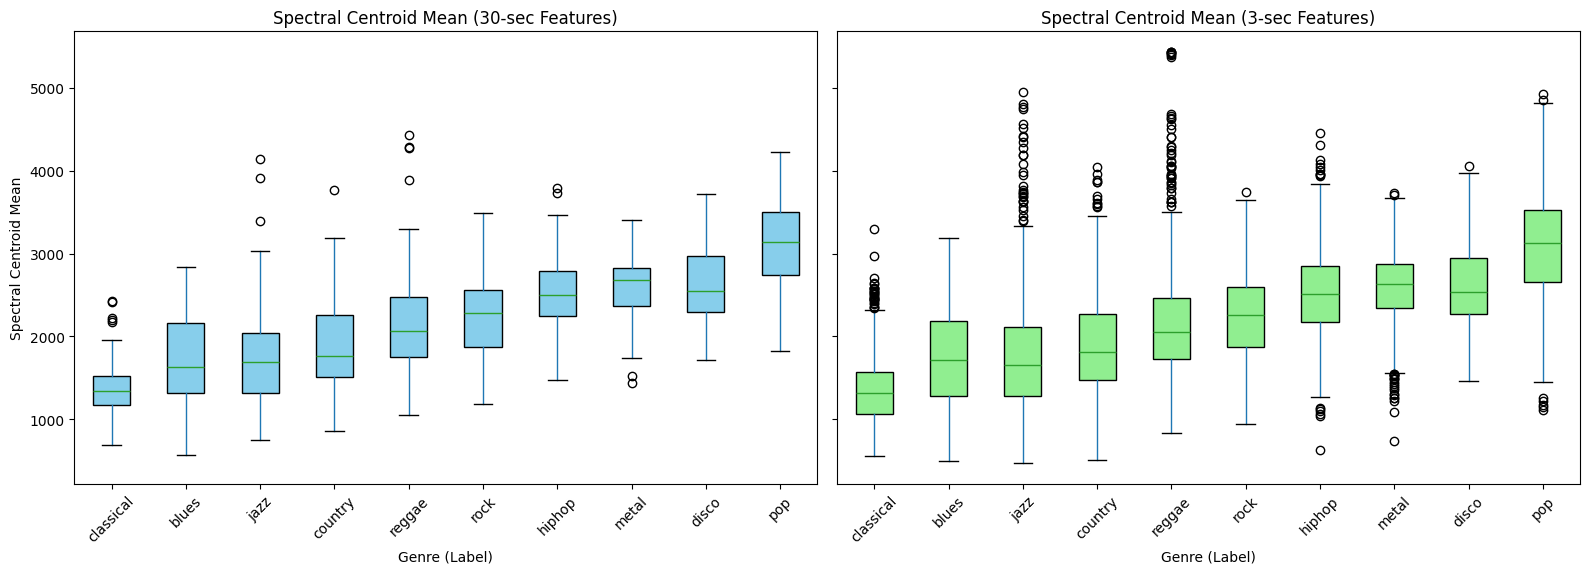

In [17]:
# Sort labels by mean of spectral_centroid_mean
sorted_labels_30_sec = f30_sec.groupby('label', observed=False)['spectral_centroid_mean'].mean().sort_values().index
sorted_labels_3_sec = f3_sec.groupby('label', observed=False)['spectral_centroid_mean'].mean().sort_values().index

f30_sec['label'] = pd.Categorical(f30_sec['label'], categories=sorted_labels_30_sec, ordered=True)
f30_sec = f30_sec.sort_values('label')

f3_sec['label'] = pd.Categorical(f3_sec['label'], categories=sorted_labels_3_sec, ordered=True)
f3_sec = f3_sec.sort_values('label')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 30-sec Box plot for spectral_centroid_mean
f30_sec.boxplot(column='spectral_centroid_mean', by='label', ax=axes[0], grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Spectral Centroid Mean (30-sec Features)')
axes[0].set_xlabel('Genre (Label)')
axes[0].set_ylabel('Spectral Centroid Mean')
axes[0].tick_params(axis='x', rotation=45)

# 3-sec Box plot for spectral_centroid_mean
f3_sec.boxplot(column='spectral_centroid_mean', by='label', ax=axes[1], grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Spectral Centroid Mean (3-sec Features)')
axes[1].set_xlabel('Genre (Label)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('')  # Remove the pandas default title
plt.tight_layout()

# Show the plot
plt.show()

#### Tempo

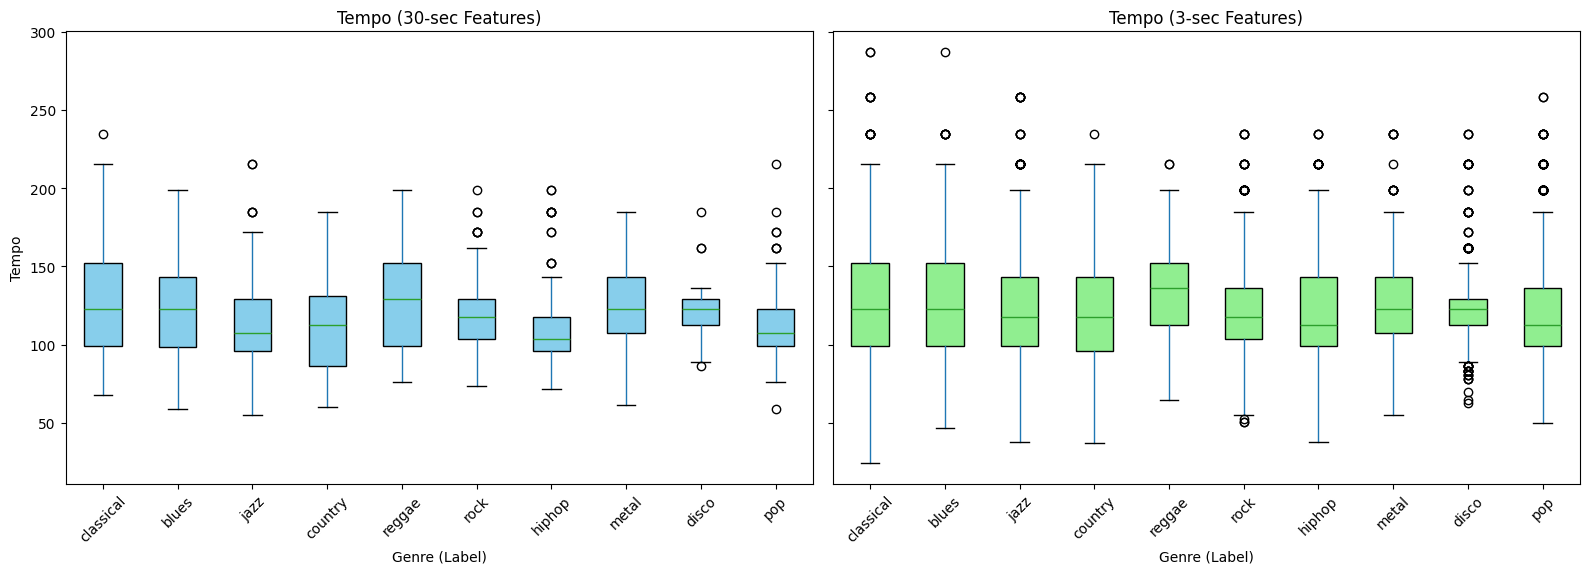

In [18]:
# Sort labels by mean of tempo
sorted_labels_30_sec = f30_sec.groupby('label', observed=False)['tempo'].mean().sort_values().index
sorted_labels_3_sec = f3_sec.groupby('label', observed=False)['tempo'].mean().sort_values().index

f30_sec['label'] = pd.Categorical(f30_sec['label'], categories=sorted_labels_30_sec, ordered=True)
f30_sec = f30_sec.sort_values('label')

f3_sec['label'] = pd.Categorical(f3_sec['label'], categories=sorted_labels_3_sec, ordered=True)
f3_sec = f3_sec.sort_values('label')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 30-sec Box plot for tempo
f30_sec.boxplot(column='tempo', by='label', ax=axes[0], grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Tempo (30-sec Features)')
axes[0].set_xlabel('Genre (Label)')
axes[0].set_ylabel('Tempo')
axes[0].tick_params(axis='x', rotation=45)

# 3-sec Box plot for tempo
f3_sec.boxplot(column='tempo', by='label', ax=axes[1], grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Tempo (3-sec Features)')
axes[1].set_xlabel('Genre (Label)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('')  # Remove the pandas default title
plt.tight_layout()

# Show the plot
plt.show()


#### Zero Crossing Rate

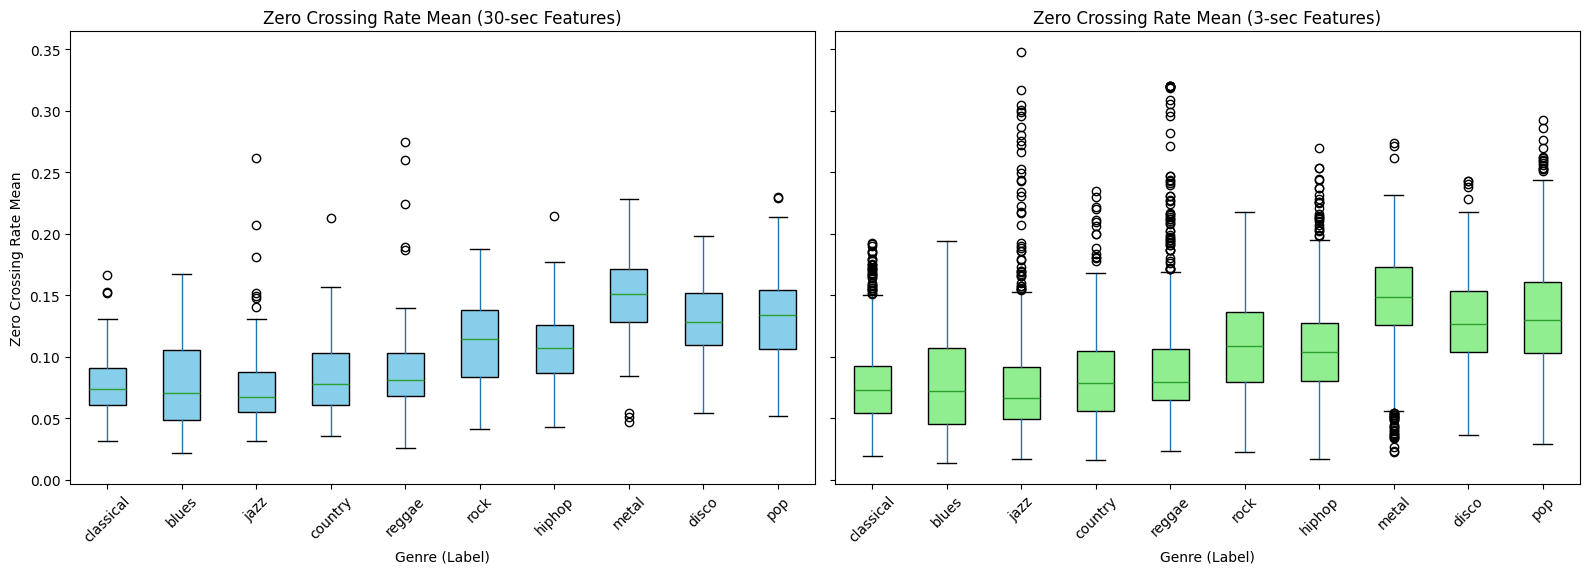

In [19]:
# Sort labels by mean of zero_crossing_rate_mean
sorted_labels_30_sec = f30_sec.groupby('label', observed=False)['zero_crossing_rate_mean'].mean().sort_values().index
sorted_labels_3_sec = f3_sec.groupby('label', observed=False)['zero_crossing_rate_mean'].mean().sort_values().index

f30_sec['label'] = pd.Categorical(f30_sec['label'], categories=sorted_labels_30_sec, ordered=True)
f30_sec = f30_sec.sort_values('label')

f3_sec['label'] = pd.Categorical(f3_sec['label'], categories=sorted_labels_3_sec, ordered=True)
f3_sec = f3_sec.sort_values('label')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 30-sec Box plot for zero_crossing_rate_mean
f30_sec.boxplot(column='zero_crossing_rate_mean', by='label', ax=axes[0], grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Zero Crossing Rate Mean (30-sec Features)')
axes[0].set_xlabel('Genre (Label)')
axes[0].set_ylabel('Zero Crossing Rate Mean')
axes[0].tick_params(axis='x', rotation=45)

# 3-sec Box plot for zero_crossing_rate_mean
f3_sec.boxplot(column='zero_crossing_rate_mean', by='label', ax=axes[1], grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Zero Crossing Rate Mean (3-sec Features)')
axes[1].set_xlabel('Genre (Label)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('')  # Remove the pandas default title
plt.tight_layout()

# Show the plot
plt.show()

## Base Model

In [83]:
csv_path = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/Data/features_30_sec.csv'
image_dir = '/projectnb/ds340/students/jmijares/audio_images'
df = pd.read_csv(csv_path)

### Feature Extraction

In [84]:
label_map = {
    'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4,
    'metal': 5, 'pop': 6, 'reggae': 7, 'rock': 8, 'jazz':9
}

# Map the genre names to integers
df['label'] = df['label'].map(label_map)

# Load the images and labels
X = []
y = []
song_names = [] 

for index, row in df.iterrows():
    try: 
        # Get the filename and genre label
        filename = row['filename'].replace('.wav', '.png')
        label = row['label']
    
        # Get the genre folder and build the correct image path
        genre_folder = row['filename'].split('.')[0]  # Extract the genre folder name (e.g., 'blues')
        img_path = os.path.join(image_dir, genre_folder, filename)  # Construct full image path
    
        # Load the corresponding image using PIL
        img = Image.open(img_path).convert('L')  # Convert to grayscale
    
        # Resize the image to 128x128
        img = img.resize((128, 128))
    
        # Convert image to a numpy array
        img = np.array(img)
    
        # Append the image and label to the respective lists
        X.append(img)
        y.append(label)
        song_names.append(filename)
        
    except FileNotFoundError as e:
        # Log the missing file and continue
        print(f"File not found: {img_path}. Skipping this file.")
        continue

File not found: /projectnb/ds340/students/jmijares/audio_images/jazz/jazz.00054.png. Skipping this file.


In [85]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the image data (scaling pixel values between 0 and 1)
X = X.astype('float32') / 255.0

# Reshape X to add a channel dimension (required for CNN)
X = X.reshape(-1, 128, 128, 1)

# One-hot encode the labels for classification
y = to_categorical(y, num_classes=10) 

### CNN

#### Split into training and test set

In [86]:
# Split off the test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

#### Data Augmentation

In [87]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

#### Base Model

In [54]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (2, 2), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Second convolutional block
model.add(Conv2D(64, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax for classification
model.add(Dense(10, activation='softmax'))  # 10 classes

/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,237,034 (16.16 MB)

 Trainable params: 4,237,034 (16.16 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32, 
    validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

final_train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy (from history): {final_train_acc:.4f}")


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.1041 - loss: 2.3512 - val_accuracy: 0.1300 - val_loss: 2.2881
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1606 - loss: 2.2434 - val_accuracy: 0.2000 - val_loss: 2.1512
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2083 - loss: 2.0791 - val_accuracy: 0.2900 - val_loss: 1.9573
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2313 - loss: 1.9487 - val_accuracy: 0.2800 - val_loss: 1.9379
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3424 - loss: 1.8189 - val_accuracy: 0.4500 - val_loss: 1.7444
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4006 - loss: 1.6728 - val_accuracy: 0.4900 - val_loss: 1.4997
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5063 - loss: 1.4016 - val_accuracy: 0.5400 - val_loss: 1.3766
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5615 - loss: 1.3031 - val_accuracy: 0.5300 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

       blues       0.67      0.38      0.48        21
   classical       0.60      1.00      0.75        12
     country       0.62      0.21      0.31        24
       disco       0.80      0.18      0.30        22
      hiphop       0.37      1.00      0.54        15
       metal       0.62      0.83      0.71        18
         pop       0.50      0.58      0.54        19
      reggae       0.42      0.45      0.43        22
        rock       0.36      0.25      0.29        20
        jazz       0.67      0.74      0.70        27

    accuracy                           0.53       200
   macro avg       0.56      0.56      0.51       200
weighted avg       0.57      0.53      0.49       200



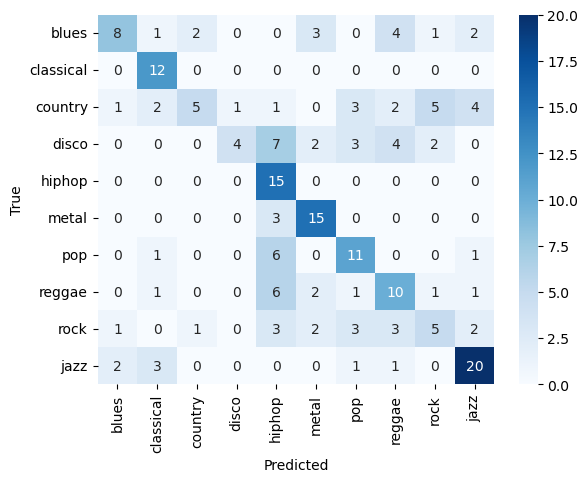

In [57]:
# Predict labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=label_map.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Hyperparameter Tuning

In [39]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Split off the test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [5]:
def build_model(hp):
    model = Sequential()
    
    # First convolutional block
    model.add(Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid']),
        input_shape=(128, 128, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Choice('dropout_1', values=[0.25, 0.5])))
    
    # Second convolutional block
    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third convolutional block
    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=128, max_value=512, step=128),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=64),
        activation=hp.Choice('activation_fc', values=['relu', 'tanh', 'sigmoid'])
    ))
    model.add(Dropout(hp.Choice('dropout_2', values=[0.25, 0.5])))
    model.add(Dense(10, activation='softmax'))  # 10 classes

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [7]:
tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    directory='hyperparameter_tuning',
    project_name='image_classification_grid',
    overwrite=True  # Overwrite the project directory if it exists
)

tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Train the best model on the training data
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the optimal hyperparameter values and accuracies
print(f"""
The optimal number of filters in the first convolutional layer is {best_hps.get('filters_1')},
with a kernel size of {best_hps.get('kernel_size_1')},
and a dropout rate of {best_hps.get('dropout_1')}.
The optimal number of filters in the 2nd convolutional layer is {best_hps.get('filters_2')},
with a kernel size of {best_hps.get('kernel_size_2')}.
The optimal number of filters in the 3rd convolutional layer is {best_hps.get('filters_3')},
with a kernel size of {best_hps.get('kernel_size_3')}.
The optimal number of units in the dense layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
Validation accuracy during tuning: {tuner.oracle.get_best_trials(1)[0].metrics.get_last_value('val_accuracy')}
Test accuracy: {test_accuracy}.
""")

Trial 551 Complete [00h 00m 19s]

Best val_accuracy So Far: 0.7200000286102295
Total elapsed time: 02h 33m 54s

Search: Running Trial #552

Value             |Best Value So Far |Hyperparameter
32                |32                |filters_1
3                 |3                 |kernel_size_1
relu              |relu              |activation_1
0.25              |0.25              |dropout_1
64                |64                |filters_2
3                 |3                 |kernel_size_2
relu              |relu              |activation_2
256               |256               |filters_3
5                 |5                 |kernel_size_3
sigmoid           |tanh              |activation_3
128               |64                |units
sigmoid           |sigmoid           |activation_fc
0.5               |0.5               |dropout_2
0.0001            |0.001             |learning_rate



Traceback (most recent call last):
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py", line 108, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tensorflow.python.framework.errors_impl.InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.


## Tuned Model

In [88]:
# Split off the test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [89]:
# Build the model with tuned hyperparameters
modelTuned = Sequential()

# First convolutional block
modelTuned.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128, 128, 1)))
modelTuned.add(MaxPooling2D(pool_size=(2, 2)))
modelTuned.add(Dropout(0.25))

# Second convolutional block
modelTuned.add(Conv2D(64, kernel_size=3, activation='relu'))
modelTuned.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
modelTuned.add(Conv2D(128, kernel_size=3, activation='tanh'))
modelTuned.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
modelTuned.add(Flatten())
modelTuned.add(Dense(64, activation='relu'))
modelTuned.add(Dropout(0.5))
modelTuned.add(Dense(10, activation='softmax'))

# Compile the model
modelTuned.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
modelTuned.summary()

/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,018 (6.48 MB)

 Trainable params: 1,699,018 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = modelTuned.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Adjust based on your dataset and computational resources
    batch_size=32,  # Adjust as necessary
    verbose=1
)

test_loss, test_acc = modelTuned.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.0930 - loss: 2.4088 - val_accuracy: 0.1300 - val_loss: 2.3161
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1081 - loss: 2.3008 - val_accuracy: 0.0800 - val_loss: 2.2703
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1652 - loss: 2.2313 - val_accuracy: 0.2100 - val_loss: 2.2141
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1857 - loss: 2.1698 - val_accuracy: 0.1500 - val_loss: 2.1053
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1990 - loss: 2.0997 - val_accuracy: 0.1400 - val_loss: 2.1281
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2155 - loss: 2.0505 - val_accuracy: 0.2300 - val_loss: 2.0651
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2388 - loss: 2.0254 - val_accuracy: 0.2500 - val_loss: 2.0788
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2666 - loss: 1.8977 - val_accuracy: 0.2600 - 

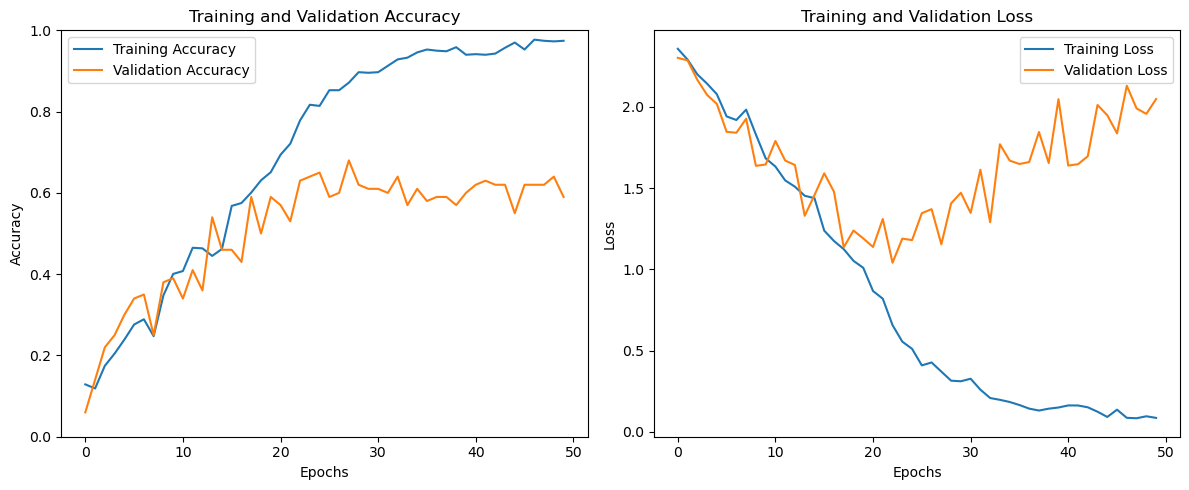

Final Training Accuracy: 0.9742
Final Validation Accuracy: 0.5900
Final Training Loss: 0.0857
Final Validation Loss: 2.0477
Test Accuracy: 0.6100


In [62]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis range for accuracy
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final accuracies and losses
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

       blues       0.46      0.62      0.53        21
   classical       0.71      1.00      0.83        12
     country       0.67      0.42      0.51        24
       disco       0.50      0.50      0.50        22
      hiphop       0.52      0.80      0.63        15
       metal       0.94      0.83      0.88        18
         pop       0.62      0.53      0.57        19
      reggae       0.68      0.68      0.68        22
        rock       0.39      0.45      0.42        20
        jazz       0.83      0.56      0.67        27

    accuracy                           0.61       200
   macro avg       0.63      0.64      0.62       200
weighted avg       0.64      0.61      0.61       200



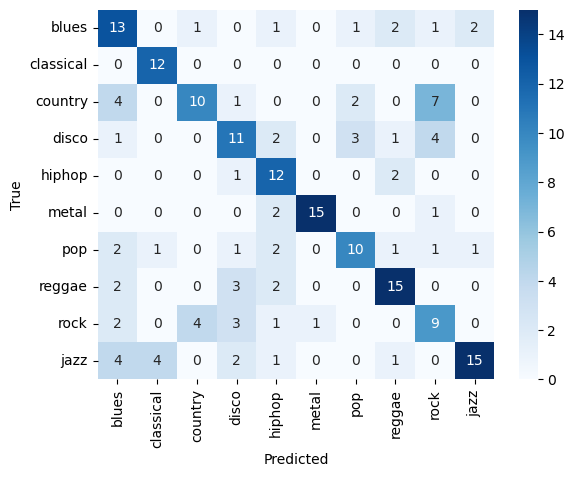

In [63]:
# Predict labels for the test set
y_pred = np.argmax(modelTuned.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=label_map.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Exploring Other Architectures (Expecting a Higher Accuracy)

### Pretrained Model VGG16

In [46]:
# Split off the test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Convert grayscale to RGB by repeating the channel three times
X_train = np.repeat(X_train, 3, axis=-1)
X_val = np.repeat(X_val, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

# Check shapes
print(f"X_train shape: {X_train.shape}")  # (num_samples, height, width, channels)
print(f"y_train shape: {y_train.shape}")  # (num_samples, 10)
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (699, 128, 128, 3)
y_train shape: (699, 10)
X_val shape: (100, 128, 128, 3)
y_val shape: (100, 10)
X_test shape: (200, 128, 128, 3)
y_test shape: (200, 10)


In [47]:
# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Make all layers in the base model non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Build the new model
modelVGG = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

modelVGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.1185 - loss: 2.5586 - val_accuracy: 0.2900 - val_loss: 2.1327
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2263 - loss: 2.1367 - val_accuracy: 0.2800 - val_loss: 2.0273
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3076 - loss: 1.9406 - val_accuracy: 0.3400 - val_loss: 1.8825
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3185 - loss: 1.8585 - val_accuracy: 0.4800 - val_loss: 1.8198
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3376 - loss: 1.8297 - val_accuracy: 0.4200 - val_loss: 1.7625
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3609 - loss: 1.7569 - val_accuracy: 0.4800 - val_loss: 1.6724
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4089 - loss: 1.7002 - val_accuracy: 0.4900 - val_loss: 1.6639
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4194 - loss: 1.6482 - val_accuracy: 0.5300 - 

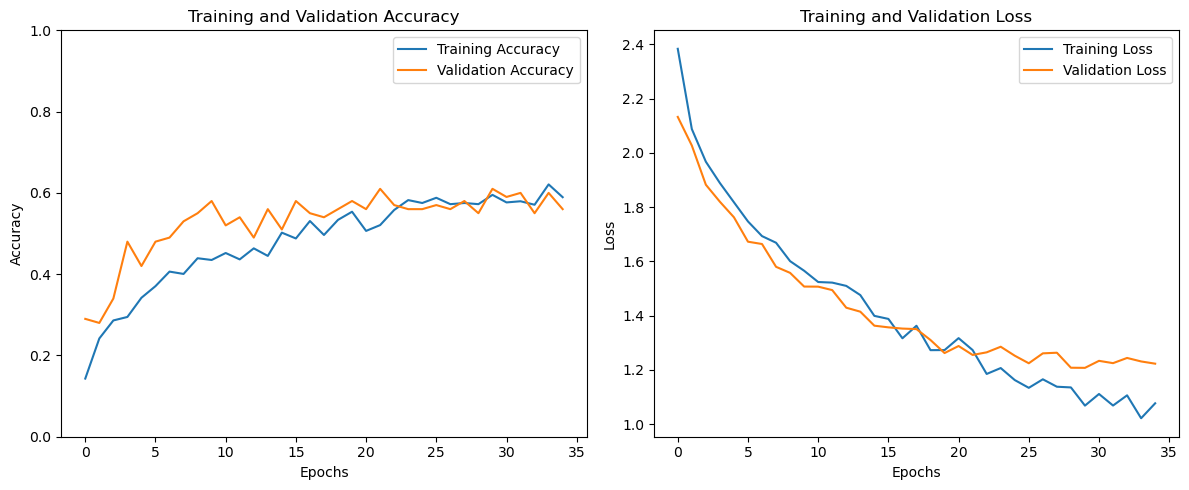

In [50]:
history = modelVGG.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Extracting accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis range for accuracy
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Multi Genre

In [78]:
# Input and output directories
input_dir = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/Data/Multi_Genre'
output_dir = '/projectnb/ds340/projects/jmijares/Data/MG_Spectrograms'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each file in the input directory
for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(input_dir, file)
        output_file_path = os.path.join(output_dir, file.replace('.wav', '.png'))
        try:
            # Load audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Generate Mel spectrogram
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            
            # Save the Mel spectrogram
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', 
                                     fmax=8000, cmap='magma')  # Use 'magma' or another colormap
            plt.axis('off')  # Remove the colorbar, axis, and title
            plt.tight_layout()
            plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
            plt.close()
            
            print(f"Processed {file} -> {output_file_path}")
        except Exception as e:
            # Handle the exception and log the error
            print(f"Skipped {file} due to error: {e}")

# Initialize empty list for images
X_mg = []
song_names = []

# Directory containing the spectrogram images
image_dir = '/projectnb/ds340/projects/jmijares/Data/MG_Spectrograms'

# Process the files
for file in os.listdir(image_dir):
    try:
        if file.endswith('.png'):
            img_path = os.path.join(image_dir, file)
            
            # Load the corresponding image using PIL without converting to grayscale
            img = Image.open(img_path).convert('RGB')  # Load the image in RGB mode
            
            # Resize the image to 128x128
            img = img.resize((128, 128))
            
            # Convert image to a numpy array
            img = np.array(img)
            
            # Append the image and filename to respective lists
            X_mg.append(img)
            song_names.append(file)
    except FileNotFoundError as e:
        # Log the missing file and continue
        print(f"File not found: {file}. Skipping this file.")
        continue

# Convert the list of images to a numpy array
X_mg = np.array(X_mg)

# Normalize the image data (scaling pixel values between 0 and 1)
X_mg = X_mg.astype('float32') / 255.0

# Reshape X_mg to add a channel dimension (required for CNN input)
X_mg = X_mg.reshape(-1, 128, 128, 3)  # Change the channel dimension to 3 (for RGB)

print(f"Prepared {len(X_mg)} spectrograms for input.")

Processed Run the World.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Run the World.png
Processed Super Bass.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Super Bass.png
Processed The Gambler.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/The Gambler.png
Processed Smooth Operator.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Smooth Operator.png
Processed Let It Be.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Let It Be.png
Processed Imagine.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Imagine.png
Processed Rolling in the Deep.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Rolling in the Deep.png
Processed Smells Like Teen Spirit.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Smells Like Teen Spirit.png
Processed Radioactive.wav -> /projectnb/ds340/projects/jmijares/Data/MG_Spectrograms/Radioactive.png
Processed Get Lucky.wav -> /projectnb/ds340/projects/

In [80]:
csv_path = '/projectnb/ds340/projects/FinalProject_SelinaJulissa/Data/multigenre.csv'
df = pd.read_csv(csv_path)

# Rename columns for easier reference
df.columns = ['Song', 'True_Genres']

# Convert 'True_Genres' from string to list of integers
df['True_Genres'] = df['True_Genres'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])

# Initialize empty lists to store true and predicted genres
true_labels = []
predicted_labels = []

# Initialize counter for partial credit accuracy
partial_correct_count = 0
total_songs = 0

# **Predict genres dynamically for each song**
for i, song in enumerate(song_names):
    # Get the single spectrogram (expand dimensions for the batch size)
    x_input = X_mg[i].reshape(-1, 128, 128, 3)

    # Predict probabilities for the current song
    y_pred = modelVGG.predict(x_input)

    # Apply 20% threshold to classify genres
    y_pred_binary = (y_pred > 0.2).astype(int)

    # Extract predicted genres (indices where the genre is 1)
    predicted_genres = [j for j, pred in enumerate(y_pred_binary[0]) if pred == 1]
    print(f"Song: {song}")
    print(f"Predicted Genres (threshold > 20%): {predicted_genres}")

    # Format the song name to match the CSV file
    song_name = song.replace(' ', '_').replace("'", "").replace('.', '') + '.png'
    
    # Get the true genres from the CSV
    true_genres_row = df[df['Song'].str.contains(song.split('.')[0], case=False, regex=True)]
    
    if not true_genres_row.empty:
        true_genres = true_genres_row['True_Genres'].values[0]
    else:
        true_genres = []

    # Create binary vectors for true and predicted genres for this song
    true_vector = [1 if genre in true_genres else 0 for genre in label_map.values()]
    predicted_vector = [1 if genre in predicted_genres else 0 for genre in label_map.values()]
    
    # Store the binary vectors for use in sklearn's classification_report
    true_labels.append(true_vector)
    predicted_labels.append(predicted_vector)

    # Increment the partial credit counter if there is any match between predicted and true genres
    if set(true_genres).intersection(set(predicted_genres)):
        partial_correct_count += 1
    total_songs += 1

# Flatten the binary arrays for sklearn 
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Make classification report
report = classification_report(true_labels, predicted_labels, target_names=list(label_map.keys()))

# Calculate the accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate partial credit accuracy (proportion of songs with at least one correct genre)
partial_credit_accuracy = partial_correct_count / total_songs

# Print the classification report, accuracy score, and partial credit accuracy
print("\nClassification Report")
print(report)

print("\nAccuracy Score:", accuracy)

print("\nPartial Credit Accuracy (at least one correct genre):", partial_credit_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
Song: Uptown Funk.png
Predicted Genres (threshold > 20%): [4, 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Song: Imagine.png
Predicted Genres (threshold > 20%): [3, 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Dont Stop Believing.png
Predicted Genres (threshold > 20%): [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: A Fifth of Beethoven.png
Predicted Genres (threshold > 20%): [1, 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Aint No Mountain High Enough.png
Predicted Genres (threshold > 20%): [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Old Town Road.png
Predicted Genres (threshold > 20%): [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Smooth Criminal.png
Predicted Genres (threshold > 20%): [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Sweet Child O Mine.png
Predicted Genres (threshold > 20%): [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Thriller.png
Predicted Genres (threshold > 20%): [3, 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Song: Bac

/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behav